1) Make a gradient descent code (Python) to find the minimum of the following function:
$$ f(x) = 2x^2  - x +2 $$
(Set up your own starting point, learning rate and epochs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def func(x):
    return 2*x**2 - x + 2

# Define the derivative of the function
def derivative(x):
    return 4*x -1 


The general formula to update the parameter $x$ is:

$$ x_{new} = x_{old} - \alpha * \frac{df}{dx} $$

where $\alpha$ is the learning rate.


In [39]:

# Gradient Descent Function
def gradient_descent(start_x, learn_rate, epochs):
    x = start_x
    x_history = [x]
    for _ in range(epochs):
        grad = derivative(x)
        x = x - learn_rate * grad
        x_history.append(x)
    return x_history

# setting the Parameters
start_x = -2 # Starting value of x
learn_rate = 0.1  # Learning rate
epochs = 24  # Number of iterations

# Run Gradient Descent
x_history = gradient_descent(start_x, learn_rate, epochs)
x = x_history[-1]
# Print the history of x values
print("History of x values:", x_history)
print(f"Minimum occurs at x = {x}")


History of x values: [-2, -1.1, -0.56, -0.236, -0.04159999999999997, 0.07504000000000002, 0.14502400000000001, 0.18701440000000003, 0.21220864, 0.227325184, 0.2363951104, 0.24183706624, 0.245102239744, 0.2470613438464, 0.24823680630784, 0.248942083784704, 0.2493652502708224, 0.24961915016249345, 0.24977149009749608, 0.24986289405849765, 0.2499177364350986, 0.24995064186105917, 0.2499703851166355, 0.2499822310699813, 0.24998933864198877]
Minimum occurs at x = 0.24998933864198877


2) Visualize how gradient descent updates the values of  𝑥 to reach the minimum value of the function (3 pts).

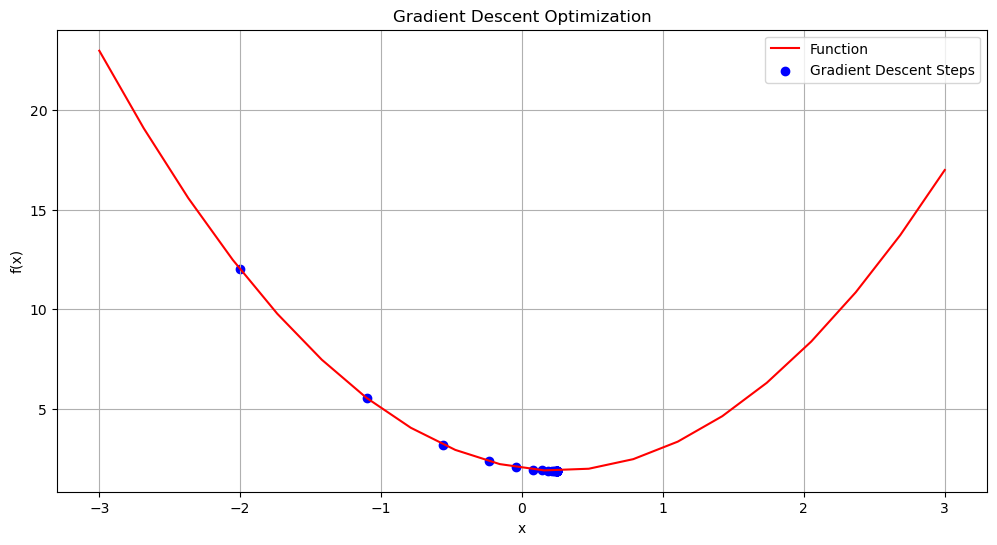

In [40]:

# Plotting
x_values = np.linspace(-3, 3, 20)
y_values = func(x_values)
plt.figure(figsize=(12,6))
plt.plot(x_values, y_values, '-r', label='Function')
plt.scatter(x_history, [func(x) for x in x_history], color='b', label='Gradient Descent Steps')
plt.title('Gradient Descent Optimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


3)  Make use of “optimize” from “scipy” to get the similar result.
(Choose a right optimizer method)

In [41]:
opt1 = optimize.minimize(func, start_x, method='L-BFGS-B')  
print("By BFGS: ", opt1)

By BFGS:    message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 1.8750000000000002
        x: [ 2.500e-01]
      nit: 2
      jac: [-2.220e-08]
     nfev: 6
     njev: 3
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>


In [42]:
opt = optimize.minimize_scalar(func) 
print("By 1d: ", opt)

By 1d:   message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 1.875
       x: 0.24999999258000005
     nit: 24
    nfev: 27


To choose appropriate optimizer : 

for smooth function
 - Single variable -> minimize_scalar

 - Multi-variable  -> BFGS	

we could observe: minimize_scalar - gave more accurate minimum (x: 0.24999999258000005) than minimize function (BFGS) (x: [ 2.500e-01])


- success: status whether the optimisation succeeded or not 

- fun: Final value of f(x) at minimum

- nit: Number of iterations (how many updates)

- nfev: Number of function evaluations (how many times it calculated f(x))

- njev: Number of gradient evaluations (how many times it calculated f'(x))
